##Breast cancer detection
###Description: Breast cancer is the most common cancer among women in the world. It accounts for 25% of all cancer cases. Breast cancer begins when cells in the breast grow out of control. These cells are usually detected by analyzing tumors that can be seen on X-rays.

In [1]:
import pandas as pd
import numpy as np

In [3]:
url="https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/breast-cancer.csv"
df = pd.read_csv(url)
df.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
525,91805,B,8.571,13.10,54.53,221.3,0.10360,0.07632,0.02565,0.01510,...,9.473,18.45,63.30,275.6,0.1641,0.2235,0.1754,0.08512,0.2983,0.10490
413,905557,B,14.990,22.11,97.53,693.7,0.08515,0.10250,0.06859,0.03876,...,16.760,31.55,110.20,867.1,0.1077,0.3345,0.3114,0.13080,0.3163,0.09251
195,875878,B,12.910,16.33,82.53,516.4,0.07941,0.05366,0.03873,0.02377,...,13.880,22.00,90.81,600.6,0.1097,0.1506,0.1764,0.08235,0.3024,0.06949
263,889403,M,15.610,19.38,100.00,758.6,0.07840,0.05616,0.04209,0.02847,...,17.910,31.67,115.90,988.6,0.1084,0.1807,0.2260,0.08568,0.2683,0.06829
71,859711,B,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,...,9.733,15.67,62.56,284.4,0.1207,0.2436,0.1434,0.04786,0.2254,0.10840


In [4]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

##The dataset includes breast tumor information. and the diagnosis column means that the tumor is cancerous (M - malignant) or non-cancerous (B - benign).

Let's change these values to 0 and 1. M->1, B->0

In [5]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df['diagnosis'] = labelencoder.fit_transform(df['diagnosis'].values)
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [6]:
df.drop(columns=['id'], inplace=True)

In [7]:
df.corrwith(df['diagnosis']).abs().sort_values(ascending=False)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
smoothness_se              0

In [8]:
X = df.drop('diagnosis', axis=1).values
y = df['diagnosis']

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [21]:
# Train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=12)

# k-NN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5) # k-ni qiymati

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [22]:
y_predict = knn.predict(X_test)

In [23]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, y_predict)

0.8958333333333334

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[66,  0],
       [ 5, 43]])

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        66
           1       1.00      0.90      0.95        48

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



##lets find out the most accurate 'k'

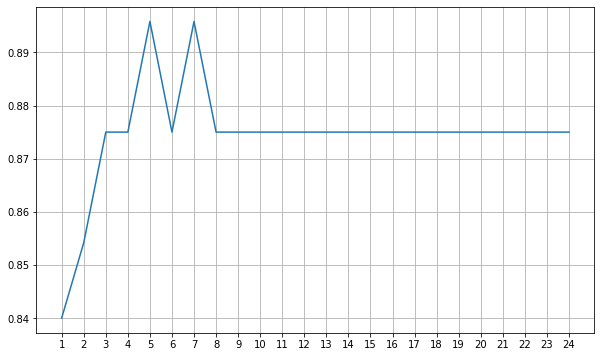

In [27]:
f1 = []
for k in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=k) # k-ni qiymati
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    f1.append(jaccard_score(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.grid()
plt.show()